In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('questions.csv')

In [3]:
df.shape


(404351, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
# Reducing the data because system not supporting huse dataset
new_df = df.sample(30000,random_state=10)

In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
55476,55476,110374,110375,How do I prepare for GRE in 45 days and score ...,How can I prepare for GRE in 20 days?,0
59974,59974,119295,119296,How much distance do I need to run daily if I ...,How do I lose a minimum of 5kg of weight in ju...,0
359487,359487,703938,703939,What is the state of eligibility for the JEE-M...,What is the state of eligibility for the JEE -...,1
101456,101456,201306,201307,How can I hack a Facebook account?,How can we hack fb?,1
317237,317237,622503,62870,What is the significance of the Johnson-Linden...,What is a simplified explanation and proof of ...,0


In [8]:
# checking if duplicate values are present or not
new_df.duplicated().sum()

0

0    19045
1    10955
Name: is_duplicate, dtype: int64
0    63.483333
1    36.516667
Name: is_duplicate, dtype: float64


<AxesSubplot:>

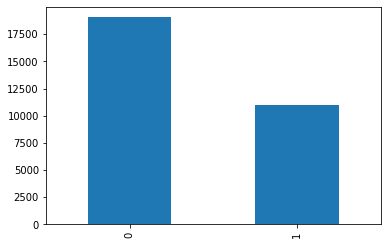

In [9]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [17]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 59812
Number of questions getting repeated 163


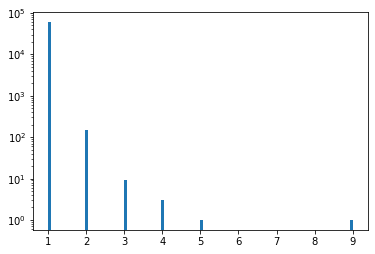

In [25]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

In [26]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [27]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
55476,55476,110374,110375,How do I prepare for GRE in 45 days and score ...,How can I prepare for GRE in 20 days?,0,51,37
59974,59974,119295,119296,How much distance do I need to run daily if I ...,How do I lose a minimum of 5kg of weight in ju...,0,72,56
359487,359487,703938,703939,What is the state of eligibility for the JEE-M...,What is the state of eligibility for the JEE -...,1,51,53
101456,101456,201306,201307,How can I hack a Facebook account?,How can we hack fb?,1,34,19
317237,317237,622503,62870,What is the significance of the Johnson-Linden...,What is a simplified explanation and proof of ...,0,60,78


In [28]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
55476,55476,110374,110375,How do I prepare for GRE in 45 days and score ...,How can I prepare for GRE in 20 days?,0,51,37,12,9
59974,59974,119295,119296,How much distance do I need to run daily if I ...,How do I lose a minimum of 5kg of weight in ju...,0,72,56,17,14
359487,359487,703938,703939,What is the state of eligibility for the JEE-M...,What is the state of eligibility for the JEE -...,1,51,53,9,11
101456,101456,201306,201307,How can I hack a Facebook account?,How can we hack fb?,1,34,19,7,5
317237,317237,622503,62870,What is the significance of the Johnson-Linden...,What is a simplified explanation and proof of ...,0,60,78,8,11


In [30]:
# Finding common words first creating set and then by & operation counting common words
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [31]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
55476,55476,110374,110375,How do I prepare for GRE in 45 days and score ...,How can I prepare for GRE in 20 days?,0,51,37,12,9,6
59974,59974,119295,119296,How much distance do I need to run daily if I ...,How do I lose a minimum of 5kg of weight in ju...,0,72,56,17,14,5
359487,359487,703938,703939,What is the state of eligibility for the JEE-M...,What is the state of eligibility for the JEE -...,1,51,53,9,11,7
101456,101456,201306,201307,How can I hack a Facebook account?,How can we hack fb?,1,34,19,7,5,3
317237,317237,622503,62870,What is the significance of the Johnson-Linden...,What is a simplified explanation and proof of ...,0,60,78,8,11,6


In [32]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [33]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
55476,55476,110374,110375,How do I prepare for GRE in 45 days and score ...,How can I prepare for GRE in 20 days?,0,51,37,12,9,6,21
59974,59974,119295,119296,How much distance do I need to run daily if I ...,How do I lose a minimum of 5kg of weight in ju...,0,72,56,17,14,5,28
359487,359487,703938,703939,What is the state of eligibility for the JEE-M...,What is the state of eligibility for the JEE -...,1,51,53,9,11,7,18
101456,101456,201306,201307,How can I hack a Facebook account?,How can we hack fb?,1,34,19,7,5,3,12
317237,317237,622503,62870,What is the significance of the Johnson-Linden...,What is a simplified explanation and proof of ...,0,60,78,8,11,6,18


In [34]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
55476,55476,110374,110375,How do I prepare for GRE in 45 days and score ...,How can I prepare for GRE in 20 days?,0,51,37,12,9,6,21,0.29
59974,59974,119295,119296,How much distance do I need to run daily if I ...,How do I lose a minimum of 5kg of weight in ju...,0,72,56,17,14,5,28,0.18
359487,359487,703938,703939,What is the state of eligibility for the JEE-M...,What is the state of eligibility for the JEE -...,1,51,53,9,11,7,18,0.39
101456,101456,201306,201307,How can I hack a Facebook account?,How can we hack fb?,1,34,19,7,5,3,12,0.25
317237,317237,622503,62870,What is the significance of the Johnson-Linden...,What is a simplified explanation and proof of ...,0,60,78,8,11,6,18,0.33


minimum characters 1
maximum characters 623
average num of characters 59


<Figure size 1800x288 with 0 Axes>

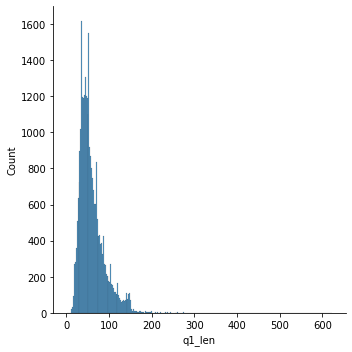

In [40]:
# Analysis of features
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

plt.figure(figsize=(25,4))
sns.displot(new_df['q1_len'])

plt.show()

minimum characters 3
maximum characters 1151
average num of characters 60


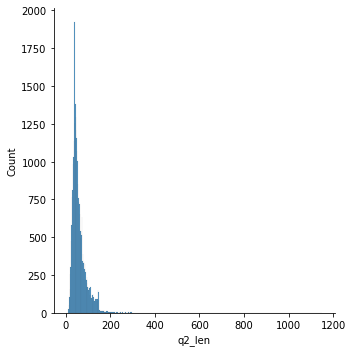

In [41]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 125
average num of words 10


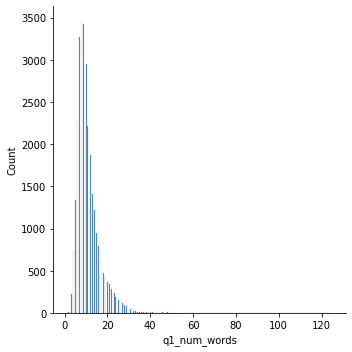

In [42]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


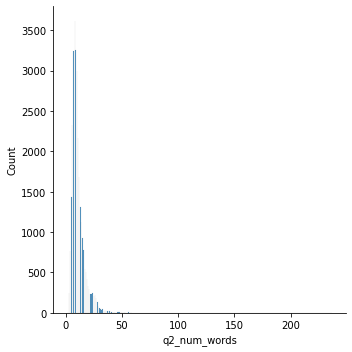

In [43]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

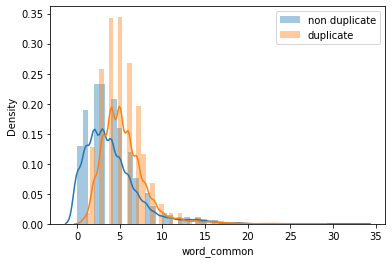

In [44]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

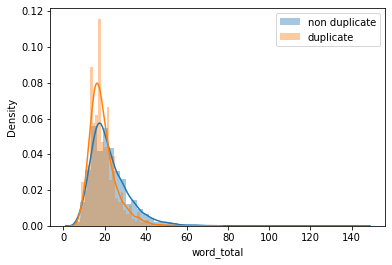

In [45]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

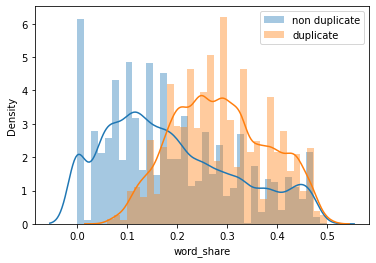

In [46]:
# word share common words to total words ratio 
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [48]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
55476,How do I prepare for GRE in 45 days and score ...,How can I prepare for GRE in 20 days?
59974,How much distance do I need to run daily if I ...,How do I lose a minimum of 5kg of weight in ju...
359487,What is the state of eligibility for the JEE-M...,What is the state of eligibility for the JEE -...
101456,How can I hack a Facebook account?,How can we hack fb?
317237,What is the significance of the Johnson-Linden...,What is a simplified explanation and proof of ...


In [49]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
55476,0,51,37,12,9,6,21,0.29
59974,0,72,56,17,14,5,28,0.18
359487,1,51,53,9,11,7,18,0.39
101456,1,34,19,7,5,3,12,0.25
317237,0,60,78,8,11,6,18,0.33


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [51]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [52]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
55476,0,51,37,12,9,6,21,0.29,0,0,...,0,0,0,0,0,0,0,0,0,0
59974,0,72,56,17,14,5,28,0.18,0,0,...,0,0,0,0,0,0,0,0,0,0
359487,1,51,53,9,11,7,18,0.39,0,0,...,0,0,0,0,0,0,0,0,0,0
101456,1,34,19,7,5,3,12,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0
317237,0,60,78,8,11,6,18,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7713333333333333

In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.768